<a href="https://colab.research.google.com/github/Phanindhra-Reddy/Data-Analytics/blob/main/text_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install easyocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import easyocr
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
img_path = 'warn.jpg'

In [ ]:
reader = easyocr.Reader(['en'])
result = reader.readtext(img_path)
for det in result:
  print(det[1],' ')

DANGER  
CONSTRUCTION  
SITE  
KEEP OUT  


In [ ]:
result

[([[100, 120], [402, 120], [402, 196], [100, 196]],
  'DANGER',
  0.9999893419167171),
 ([[43, 219], [458, 219], [458, 279], [43, 279]],
  'CONSTRUCTION',
  0.9999553659240563),
 ([[190, 270], [312, 270], [312, 326], [190, 326]],
  'SITE',
  0.9999097585678101),
 ([[87, 327], [415, 327], [415, 393], [87, 393]],
  'KEEP OUT',
  0.8994516242307503)]

In [ ]:
temp = []
for rnd in result:
  temp.append(rnd[2])

r = [int(x*100) for x in temp]
#r = [99,99,99,89]


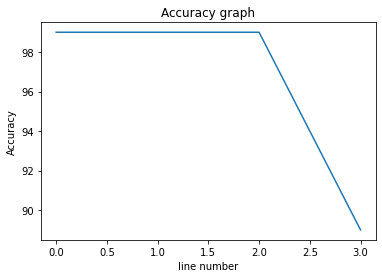

In [ ]:
plt.xlabel("line number")
plt.ylabel("Accuracy")
plt.title("Accuracy graph")
plt.plot(r)
plt.show()

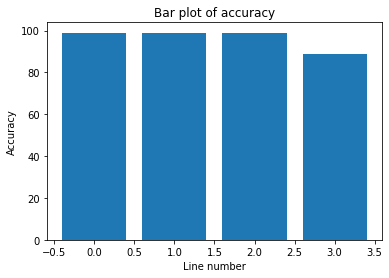

In [ ]:
left = []
for i in range(len(result)):
  left.append(i)
height = r
plt.bar(left,height,width=0.8)
plt.xlabel("Line number")
plt.ylabel("Accuracy")
plt.title("Bar plot of accuracy")
plt.show()

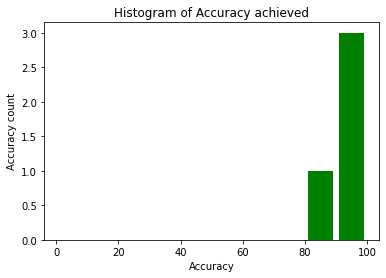

In [ ]:
range = (0,100)
plt.hist(r,10,range,color='green',histtype='bar',rwidth=0.8)
plt.xlabel('Accuracy')
plt.ylabel('Accuracy count')
plt.title('Histogram of Accuracy achieved')
plt.show()

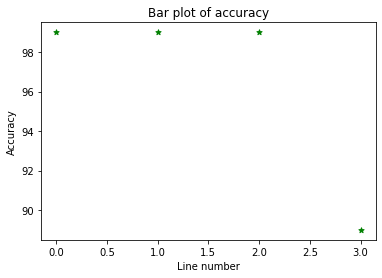

In [ ]:
d = []
for i in left:
  d.append(i)
plt.scatter(d,r,label= "stars", color= "green",marker= "*", s=30)
plt.xlabel("Line number")
plt.ylabel("Accuracy")
plt.title("Scatter plot of accuracy")
plt.show()

In [ ]:
average = sum(r)/len(r)
average

96.5

In [ ]:
top_left = tuple(result[0][0][0])
btm_right = tuple(result[0][0][2])
text = result[0][1]
font = cv2.FONT_HERSHEY_SIMPLEX

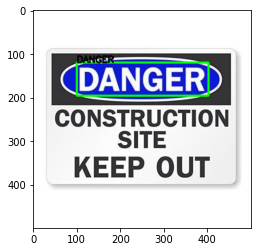

In [ ]:
img = cv2.imread(img_path)
img = cv2.rectangle(img,top_left,btm_right,(0,255,0),3)
img = cv2.putText(img,text,top_left,font,0.7,(0,0,0),2,cv2.LINE_AA)
plt.imshow(img)
plt.show()

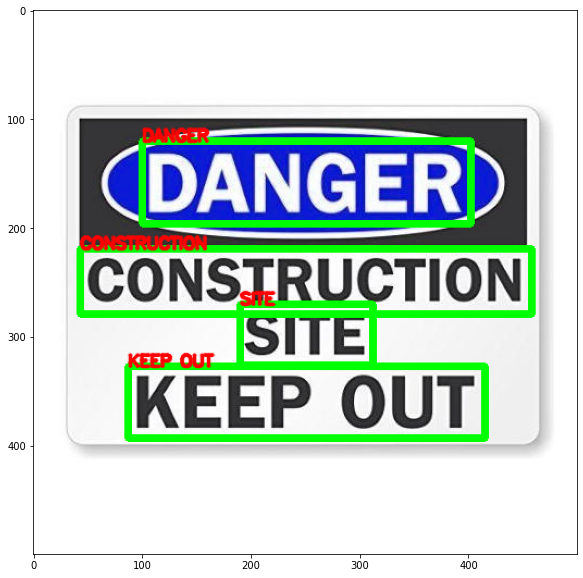

In [ ]:
img = cv2.imread(img_path)

for detection in result:
  top_left = tuple(detection[0][0])
  btm_right = tuple(detection[0][2])
  text = detection[1]
  img = cv2.rectangle(img,top_left,btm_right,(0,255,0),5)
  img = cv2.putText(img,text,top_left,font,0.5,(255,0,0),2,cv2.LINE_AA)

plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()